<a href="https://colab.research.google.com/github/KevinNobre/First-NN/blob/main/My_First_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Criando a minha primeira Rede Neural, utilizando dados baseado num jogo de dardos.

Implementação de uma rede neural com o framework Keras

In [ ]:
import pandas as pd

#Separação de dados de treino e teste
from sklearn.model_selection import train_test_split

#Bibliotecas para geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#Arquitetura para redes fully connected
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
dados = pd.read_csv("/content/darts.csv")
dados.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [ ]:
dados.shape

(800, 3)

In [ ]:
dados.columns

Index(['xCoord', 'yCoord', 'competitor'], dtype='object')

In [ ]:
#Dados de entrada (X) e saída (Y)
X = dados[['xCoord', 'yCoord']] #Features do modelo
y = dados ['competitor'] #target (Valor a ser previsto)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(640, 2)

In [ ]:
y_train.shape

(640,)

In [ ]:
dados['competitor'].value_counts()

,count
competitor,
Steve,200
Susan,200
Michael,200
Kate,200


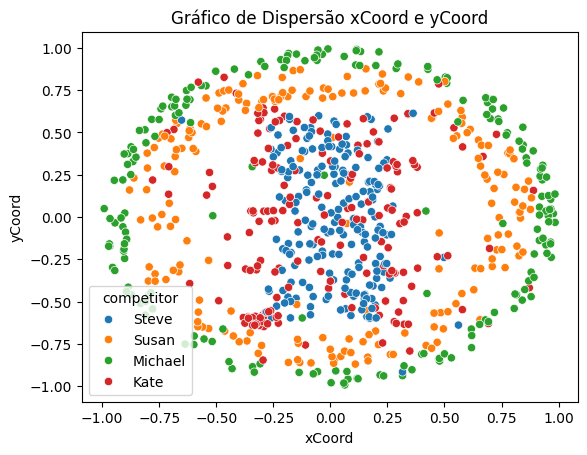

In [ ]:
# Gráfico de dispersão xCoord e yCoord
sns.scatterplot(data=dados, x='xCoord', y='yCoord', hue='competitor')
plt.title('Gráfico de Dispersão xCoord e yCoord')
plt.show()

In [ ]:
# Arquitetura da Rede Neural
modeloRNA = Sequential()

In [ ]:
# Input layer = 2 neurônios (2 features)

# Hidden Layer 1 ---------> 128 neurônios (escolhido arbitrariamente)
modeloRNA.add(Dense(units=128, activation='relu', input_dim=2))

# Hidden Layer 2 ---------> 32 neurônios (escolhido arbitrariamente)
modeloRNA.add(Dense(units=32, activation='relu'))

#Output Layer --------> 4 neurônios (4 saídas)
# A função softmax é utilizada em problemas de classificação multiclasses
# A função sigmoid é utilizada em problemas de classificação binária
modeloRNA.add(Dense(units=4, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Resumo da arquitetura
modeloRNA.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,644 (18.14 KB)

 Trainable params: 4,644 (18.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilando a rede
#Função de custo (Loss Function)
#Multiclasses -----> categorical_crossentropy
#Binária -----> binary_crossentropy
# Regressão ----> mse (erro médio quadrático)

modeloRNA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Conversão do array y em 4 colunas booleanas
# ISso é necessário para adequar o formato dos dados de y Á arquitetura de rede
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
y_train

,Kate,Michael,Steve,Susan
264,False,True,False,False
615,True,False,False,False
329,False,True,False,False
342,False,True,False,False
394,True,False,False,False
...,...,...,...,...
71,True,False,False,False
106,False,False,False,True
270,False,False,False,True
435,True,False,False,False


In [ ]:
#Treinamento da Rede
modeloRNA.fit(X_train, y_train, epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2302 - loss: 1.3961
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3058 - loss: 1.3631  
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4020 - loss: 1.3278  
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5055 - loss: 1.2929 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5458 - loss: 1.2438 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5563 - loss: 1.1801 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5619 - loss: 1.1256 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5781 - loss: 1.0557  
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6004 - loss: 0.9835 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6123 - loss: 0.9753 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5678 - loss: 0.9567 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [ ]:
#Previsão
y_predict = modeloRNA.predict(X_test)
y_predict

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


array([[3.92325640e-01, 1.74198562e-04, 5.94053626e-01, 1.34466039e-02],
       [4.26434074e-03, 9.32704329e-01, 1.68501830e-03, 6.13461733e-02],
       [5.68074822e-01, 1.23139180e-04, 4.20455486e-01, 1.13465451e-02],
       [2.48079166e-01, 9.99072217e-04, 7.15051055e-01, 3.58707532e-02],
       [1.94718510e-01, 2.51063866e-05, 8.01995933e-01, 3.26038711e-03],
       [3.55227739e-02, 4.67117220e-01, 1.69333842e-04, 4.97190595e-01],
       [1.17514366e-02, 8.26230824e-01, 3.70850694e-06, 1.62013993e-01],
       [1.13543693e-03, 9.52234983e-01, 1.53200235e-04, 4.64761667e-02],
       [7.55015165e-02, 3.59531105e-01, 1.61589291e-02, 5.48808455e-01],
       [4.85381717e-03, 8.50028098e-01, 6.28289627e-07, 1.45117596e-01],
       [2.75513351e-01, 9.27095190e-02, 6.63375333e-02, 5.65439522e-01],
       [7.46880919e-02, 3.16782296e-01, 7.90950799e-05, 6.08450413e-01],
       [3.22409093e-01, 3.90599146e-02, 2.09088832e-01, 4.29442167e-01],
       [4.31511998e-02, 4.92070377e-01, 6.81728765e

Probabilidade da Classe
Classe 1: 0.0617
Classe 2: 0.1695
Classe 3: 0.000041
Classe 4: 0.768